# <center>第二次作业：平飞推力曲线 </center>

## 1.飞行状态方程

定常飞行时，做如下假设：

(1).飞机运动轨迹在铅锤平面内

(2).地球表面为平面，重力加速度为常量,无风

(3).发动机推力作用线沿飞行速度方向线

(4).燃油耗较少，近似为常量

因此运动方程一般可以写为:

$$
\begin{cases}
T-D-Wsin\gamma=0 \\
L-Wcos\gamma=0 \\
\frac{dX}{dt}=Vcos\gamma \\
\frac{dh}{dt}=Vsin\gamma \tag{1.1}
\end{cases}
$$

一般而言$T$代表推力,若记$T-D=\Delta T$,称之剩余推力。

当$\Delta T>0$,$\gamma>0$,飞机将做长直线上升飞行；

当$\Delta T=0$,$\gamma=0$,飞机将做定常水平直线飞行；

当$\Delta T<0$,$\gamma<0$,飞机将做定常下滑飞行；

因此飞机做水平平飞的时候，$\gamma=0$,方程(1.1)可以写成:

$$
\begin{cases}
T=D \\
W=L
\tag{1.2}
\end{cases}
$$

## 2.飞机平飞所需推力绘制

绘制步骤如下

(1).给定$H=const,W=const$,可以得到:
$$
\begin{align}
C_L&=\frac{2L}{\rho V^2 S}=\frac{2W}{\rho V^2 S}=\frac{2W}{\rho a^2 S M^2}
\tag{2.1}
\end{align}
$$

因此需要确定高度$H$以及重量$W$;

(2).查出该高度下的大气谬$\rho$和声速$a$,计算参数(翼载荷):$\omega=\frac{2W}{\rho a^2 S}$;

(3).取步长$\Delta M$,给定$n$个马赫数$M_k=M_0+k\cdot\Delta M(k=1,2,\dots,n)$,根据(2.1)给出升力系数$C_{lK}$:

$$
c_{Lk}=\frac{2W}{\rho a^2SM^2}=\frac{\omega}{M_k^2}
\tag{2.2}
$$

(4).根据升力系数可以从飞机的极曲线查出对应的阻力系数$C_{Dk}$

(5).计算升阻比:

$$
K_k=\frac{C_{Lk}}{C_{Dk}}
\tag{2.3}
$$

(6).利用公式计算需用推力:

$$
T_{REk}=\frac{W}{K_k}
\tag{2.4}
$$

(7).以$M_k$为横坐标,$T_{REk}$为纵坐标绘图,即所求,以下是代码模块:

In [30]:
import numpy as np
import math 
import matplotlib.pyplot as plt

In [31]:
def StdAtpUS(h):
    #输入高度值，返回该高度下的温度，压强，密度
    global h1,h2,h3,a0,a2,g,R,T0,p0,rho0,T1,p1,rho1,T2,p2,rho2
    #声明使用的全局变量，这样不用在每次调用函数时都计算一遍，提升代码性能
    if h<=h1:
        #print('Troposphere'对流层)
        T=T0+a0*h
        p=p0*(T/T0)**(-g/a0/R-1)
        rho=rho0*(T/T0)**(-g/a0/R-1)
        pass
    elif h1<=h<=h2:
        #print('Tropopouse'对流层顶部)
        T=T1
        p=p1*math.exp(-g/R/T*(h-h1))
        rho=rho1*math.exp(-g/R/T*(h-h1))
        pass
    elif h2<=h<=h3:
        #print('Statosphere'平流层)
        T=T2+a2*(h-h2)
        p=p2*(T/T2)**(-g/a2/R)
        rho=rho2*(T/T2)**(-g/a2/R-1)
        pass
    else:
        #print('Error:the alititude should be less than 9000 ft'超过高度范围，警告！)
        pass
    return T,p,rho

In [32]:
h1,h2,h3=3.6089e4,6.5616e4,9.0e4 #依次给定三个临界高度
a0,a2,g=-3.567e-3,5.494e-4,32.2 #给定lamda值，重力加速度(ft/s^2)
R=1716 #大气气体常数
T0,p0,rho0=518.67,2116.2,2.3769e-3 
#给定三个标准海平面大气参数值，温度(兰氏温度)，压强（lbf/ft^2），密度(slug/ft^3/(lbf*s^2/ft^4))
T1=T0+a0*h1
p1=p0*(T1/T0)**(-g/a0/R)
rho1=rho0*(T1/T0)**(-g/a0/R-1)
#对流层温度线性变化，其余两个参数代入公式
T2=T1
p2=p1*math.exp(-g/R/T2*(h2-h1))
rho2=rho1*math.exp(-g/R/T2*(h2-h1))
#平流层温度变化不大，温度近似为定值
#上述过程完成数据初始化

V=np.arange(150,1000,10,float)
T=np.zeros(V.size)
Tmax=np.zeros(V.size)
W,S,Cd0,eta,alt=73000,950,0.015,0.05,10000
Tsmax,m,CLmax=12500,0.6,2.8
Temp,Pr,rho=StdAtpUS(alt)
Temps,Prs,rhos=StdAtpUS(0) #sea level 海平面
Vs=math.sqrt(2*W/(rho*S*CLmax)) #stall speed
Ve=math.sqrt(2*W/(rho*S)*math.sqrt(eta/Cd0)) #max endurance speed最大航程速度
roots=np.roots([1/2*rho*S*Cd0,0,-Tsmax*(rho/rhos)**m,0,2*eta*W**2/rho/S]) #求根
r=sorted(x.real for x in roots) #根的排序
Vn1,Vn2,Vmin,Vmax=r
Tvmin=1/2*rho*Vmin**2*S*Cd0+2*eta*W**2/(rho*Vmin**2*S)
Tvmax=1/2*rho*Vmax**2*S*Cd0+2*eta*W**2/(rho*Vmax**2*S)
Tve=1/2*rho*Ve**2*S*Cd0+2*eta*W**2/(rho*Ve**2*S)
print('Vs=%f,Ve=%f,Vmin=%f,Vmax=%f'%(Vs,Ve,Vmin,Vmax))
#计算部分

Vs=176.868377,Ve=399.897688,Vmin=178.628139,Vmax=895.257384


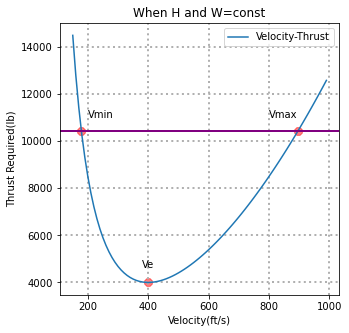

In [33]:
for i in range(V.size):
    T[i]=1/2*rho*V[i]**2*S*Cd0+2*eta*W**2/(rho*V[i]**2*S)
    Tmax[i]=(rho/rhos)**m*Tsmax
    pass

fig=plt.figure(figsize=(5,5))
pic=fig.add_subplot(1,1,1)
pic.plot(V,T,label='Velocity-Thrust')
plt.legend(loc='upper right')
plt.scatter(Vmin,Tvmin,s=70,c='red',marker='8',alpha=0.5)
plt.scatter(Vmax,Tvmax,s=70,c='red',marker='8',alpha=0.5)
plt.scatter(Ve,Tve,s=70,c='red',marker='8',alpha=0.5)
plt.title('When H and W=const')
plt.text(380,4600,'Ve')
plt.text(200,11000,'Vmin')
plt.text(800,11000,'Vmax')
plt.xlabel('Velocity(ft/s)')
plt.ylabel('Thrust Required(lb)')
plt.grid(linestyle=':',linewidth=2)
plt.axhline(y=Tvmin,c='purple',linestyle='-',linewidth=2)
plt.show()